In [47]:
# Importing all the required Libraries

import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split


In [48]:
# loading the new dataset file and displaying the first few rows to understand its structure.

# Load the new dataset
new_data = pd.read_excel('Final_Updated.xlsx')

# Display the first few rows of the new dataset
new_data.head()

,Time,Driver,Position,DriverNumber,PitFlag,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,...,IsAccurate,LapTime_in_seconds,laptime_sum_sectortimes,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 01:02:45.730000,VER,1,1,0,0 days 00:01:39.019000,1,1,0.000,42.414,...,False,99.019,0.000,27.3,22,1016.7,False,31.2,226,0.5
1,0 days 01:04:45.759000,VER,1,1,0,0 days 00:01:37.974000,2,1,31.342,42.504,...,True,97.974,97.974,27.3,22,1016.7,False,31.1,208,0.0
2,0 days 01:06:45.757000,VER,1,1,0,0 days 00:01:38.006000,3,1,31.388,42.469,...,True,98.006,98.006,27.3,22,1016.7,False,31.2,170,0.6
3,0 days 01:07:45.756000,VER,1,1,0,0 days 00:01:37.976000,4,1,31.271,42.642,...,True,97.976,97.976,27.3,22,1016.7,False,31.2,204,0.4
4,0 days 01:09:45.754000,VER,1,1,0,0 days 00:01:38.035000,5,1,31.244,42.724,...,True,98.035,98.035,27.2,22,1016.7,False,31.0,206,1.0


In [49]:

# # Define the sanitize function
# def sanitize(text):
#     return text.strip() if text else ''

# # Re-define the file path as the environment has been reset
# file_path = '/content/Race report _ Pitwall_Alex.html'

# # Read and parse the HTML file again
# with open(file_path, 'r', encoding='utf-8') as file:
#     content = file.read()

# soup = BeautifulSoup(content, 'html.parser')
# table = soup.find('table', class_='data-table data-table-small')

# # Initialize the list to store lap and position data
# lap_position_data = []

# if table:
#     # Find the 'Lap' and 'Position' column indices
#     headers = [sanitize(th.get_text()) for th in table.find_all('th')]
#     lap_index = next((i for i, header in enumerate(headers) if 'lap' in header.lower()), None)
#     position_index = next((i for i, header in enumerate(headers) if 'position' in header.lower()), None)

#     # Extract rows only if both 'Lap' and 'Position' headers are found
#     if lap_index is not None and position_index is not None:
#         for tr in table.find_all('tr'):
#             tds = tr.find_all('td')
#             if len(tds) > max(lap_index, position_index):
#                 lap = sanitize(tds[lap_index].get_text())
#                 position = sanitize(tds[position_index].get_text())
#                 lap_position_data.append({'Lap': lap, 'Position': position})

#         # Convert to DataFrame and save to Excel
#         if lap_position_data:
#             df_lap_position = pd.DataFrame(lap_position_data)
#             excel_file_path = '/content/Abu/lap_position_data_Alex.xlsx'
#             df_lap_position.to_excel(excel_file_path, index=False)
#         else:
#             excel_file_path = "Data extracted but found to be empty."
#     else:
#         excel_file_path = "Either 'Lap' or 'Position' header was not found in the table."
# else:
#     excel_file_path = "Table with class 'data-table data-table-small' was not found in the HTML."

# # Return the file path and a sample of the data if available
# excel_file_path, df_lap_position.head() if lap_position_data else "No Lap and Position data found"


In [50]:
# Check for missing values in the dataset
new_missing_values = new_data.isnull().sum()

# Check for unique values in each column of the dataset to identify inconsistencies or irrelevant columns
new_unique_values = new_data.nunique()

# Display missing values and unique values for each column in the dataset
new_missing_and_unique_values = pd.DataFrame({'Missing Values': new_missing_values, 'Unique Values': new_unique_values})
new_missing_and_unique_values.sort_values(by='Missing Values', ascending=False)

#new_data1= new_data.drop

,Missing Values,Unique Values
Time,0,2876
Driver,0,22
Team,0,10
LapStartTime,0,23834
LapStartDate,0,17424
TrackStatus,0,17
Position.1,0,20
Deleted,0,2
DeletedReason,0,270
FastF1Generated,0,1


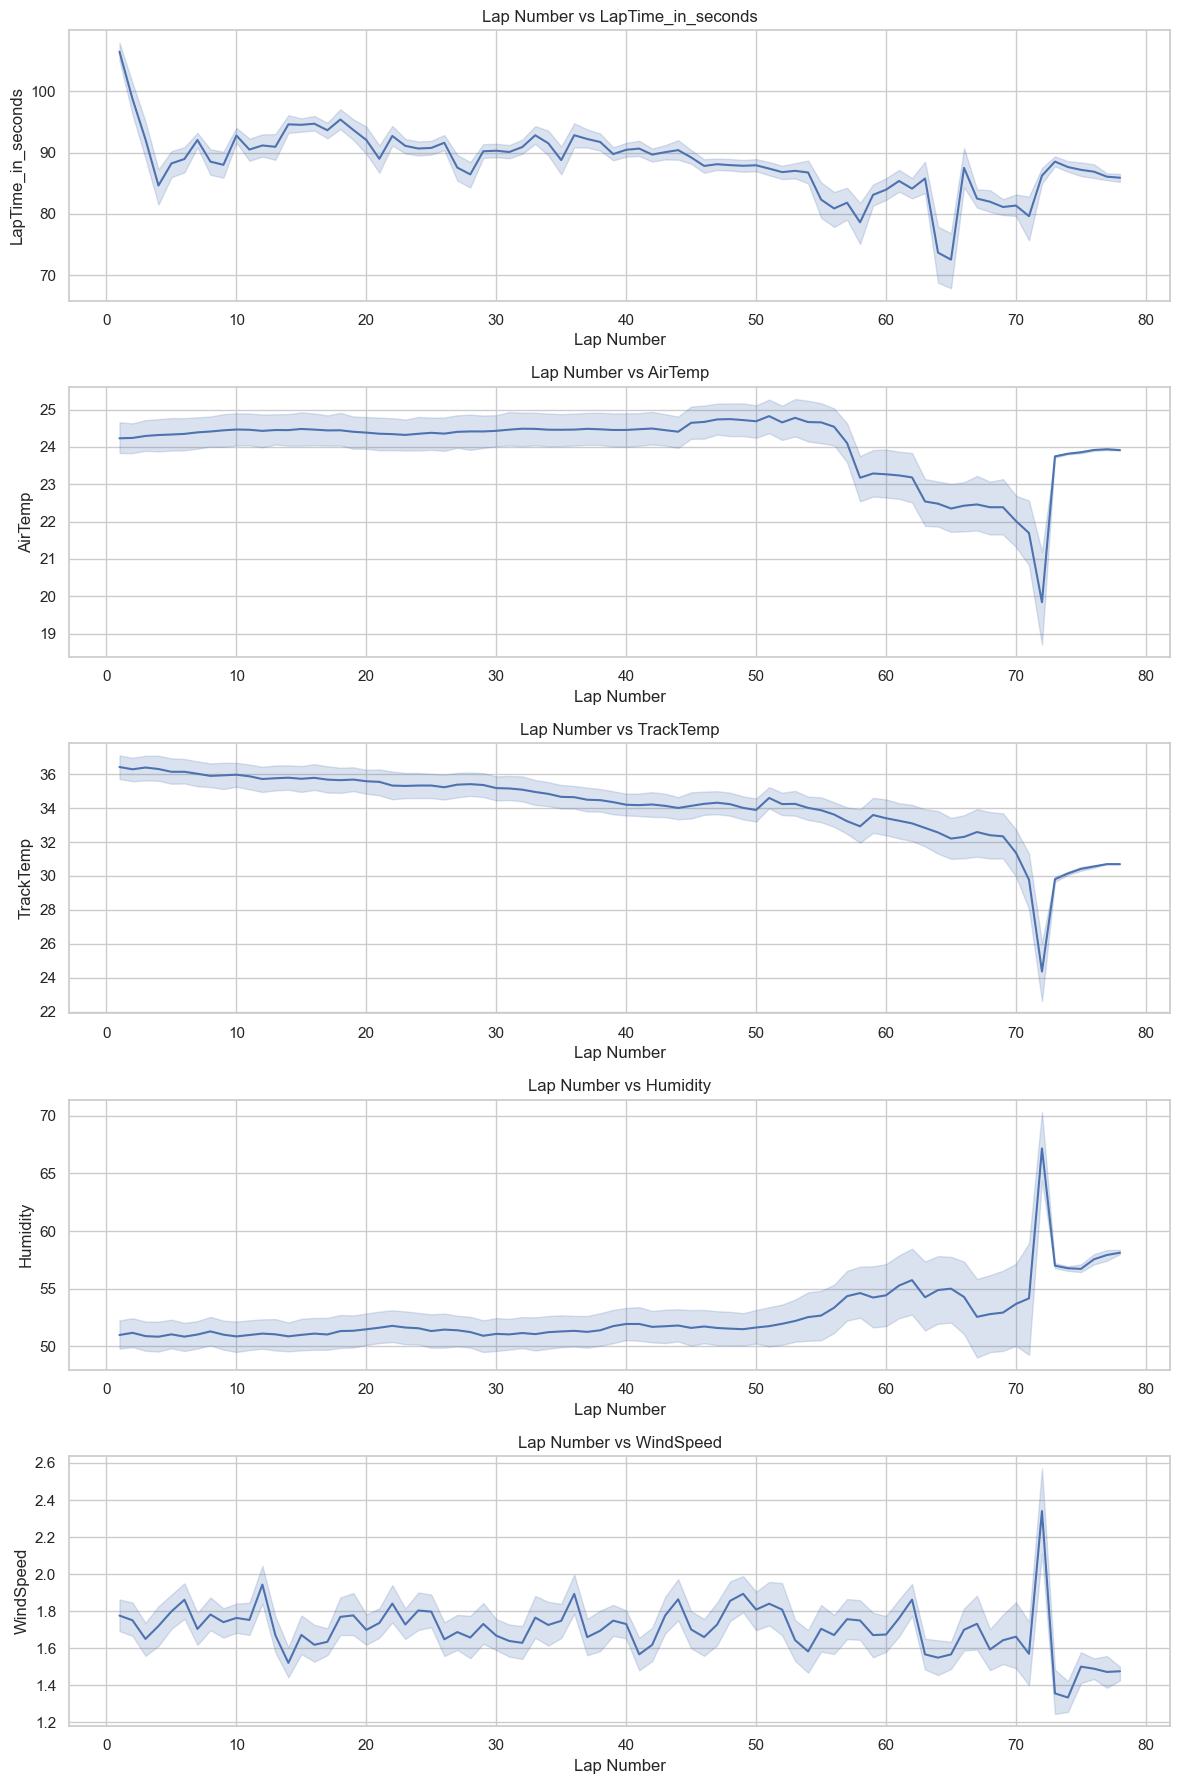

In [51]:

# Setting the style for the plots
sns.set(style="whitegrid")

# Selecting a few columns for plotting
columns_to_plot = [ 'LapTime_in_seconds', 'AirTemp', 'TrackTemp', 'Humidity', 'WindSpeed']

# Creating subplots
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(12, 18))

# Looping through the selected columns to create plots
for i, col in enumerate(columns_to_plot):
    sns.lineplot(data=new_data, x='LapNumber', y=col, ax=axes[i])
    axes[i].set_title(f'Lap Number vs {col}')
    axes[i].set_xlabel('Lap Number')
    axes[i].set_ylabel(col)

# Adjusting layout
plt.tight_layout()

# Show the plots
plt.show()

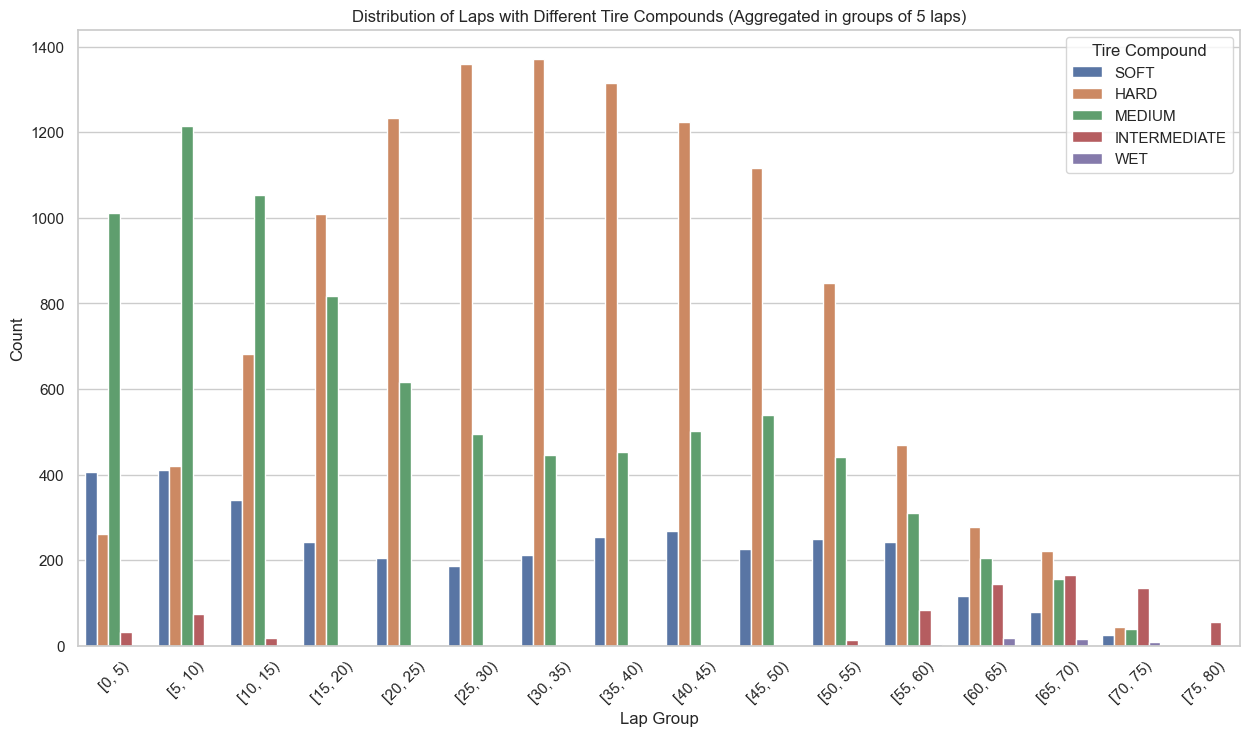

In [52]:
# Aggregating the laps in groups of 5 and then plotting the distribution of tire compounds for these aggregated laps
unique_compounds = new_data['Compound'].unique()
# Creating a new column for aggregated lap groups (e.g., laps 1-5, 6-10, etc.)
new_data['LapGroup'] = pd.cut(new_data['LapNumber'], bins=range(0, max(new_data['LapNumber']) + 5, 5), right=False)

# Plotting the distribution of laps with each tire compound for the aggregated lap groups
plt.figure(figsize=(15, 8))
sns.countplot(x='LapGroup', hue='Compound', data=new_data)
plt.title('Distribution of Laps with Different Tire Compounds (Aggregated in groups of 5 laps)')
plt.xlabel('Lap Group')
plt.ylabel('Count')
plt.legend(title='Tire Compound', labels=unique_compounds)
plt.xticks(rotation=45)

plt.show()

In [53]:


# Creating a new dataframe for the transformed data
categorical_cols = new_data.select_dtypes(include=['object', 'bool']).columns
numerical_cols = new_data.select_dtypes(include=['int64', 'float64']).columns
numerical_cols= numerical_cols.drop(['PitFlag','Position'])
transformed_df = new_data.copy()
# Converting all categorical columns to string type
for col in categorical_cols:
    new_data[col] = new_data[col].astype(str)
    
# Define LabelEncoder   
label_encoder = LabelEncoder()

# Re-applying label encoding to categorical columns
for col in categorical_cols:
    transformed_df[col] = label_encoder.fit_transform(new_data[col])

# Re-displaying the first few rows of the transformed dataframe
transformed_df.head()

# Applying label encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    transformed_df[col] = label_encoder.fit_transform(new_data[col])

# Applying standard scaling to numerical columns
for col in numerical_cols:
    transformed_df[col] = StandardScaler().fit_transform(new_data[[col]])

transformed_df = transformed_df.drop(['LapGroup'],axis=1)

# Displaying the first few rows of the transformed dataframe
transformed_df.head()


,Time,Driver,Position,DriverNumber,PitFlag,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,...,IsAccurate,LapTime_in_seconds,laptime_sum_sectortimes,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,48,20,1,-1.159067,0,12731,-1.606925,-1.184051,-3.226265,0.842232,...,0,0.516900,-4.369246,0.674409,-2.017359,0.58553,0,-0.503372,0.563311,-1.245745
1,97,20,1,-1.159067,0,12116,-1.552696,-1.184051,0.348890,0.853676,...,1,0.457977,0.397534,0.674409,-2.017359,0.58553,0,-0.517005,0.364427,-1.753953
2,148,20,1,-1.159067,0,12137,-1.498466,-1.184051,0.354137,0.849226,...,1,0.459781,0.399091,0.674409,-2.017359,0.58553,0,-0.503372,-0.055438,-1.144104
3,165,20,1,-1.159067,0,12117,-1.444236,-1.184051,0.340791,0.871224,...,1,0.458090,0.397632,0.674409,-2.017359,0.58553,0,-0.503372,0.320231,-1.347387
4,229,20,1,-1.159067,0,12157,-1.390006,-1.184051,0.337712,0.881650,...,1,0.461416,0.400502,0.651836,-2.017359,0.58553,0,-0.530638,0.342329,-0.737538


In [54]:

# Assuming 'transformed_df' is your standardized dataset
data = transformed_df

# Splitting the dataset for 'Position' prediction
X = data.drop(['Position'], axis=1)  # Features
y_position = data['Position']  # Target for 'Position'

# Splitting data into training and testing sets for 'Position'
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X, y_position, test_size=0.2, random_state=42)

X1 = data.drop(['Position', 'PitFlag'], axis=1)  # Features
# Repeat the process for 'PitFlag' prediction
y_pitflag = data['PitFlag']  # Target for 'PitFlag'

# Splitting data for 'PitFlag'
X_train_pf, X_test_pf, y_train_pf, y_test_pf = train_test_split(X1, y_pitflag, test_size=0.2, random_state=42)


In [55]:

# Defining base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Defining the meta-learner
meta_learner = LogisticRegression()

# Building the stacking ensemble
stacked_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Training the stacked model
stacked_model.fit(X_train_pf, y_train_pf)

# Making predictions and evaluating the model
y_pred = stacked_model.predict(X_test_pf)
print("Accuracy:", accuracy_score(y_test_pf, y_pred))
print("\nClassification Report:\n", classification_report(y_test_pf, y_pred))


Accuracy: 0.9979495591552183

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4504
           1       0.99      0.98      0.99       373

    accuracy                           1.00      4877
   macro avg       1.00      0.99      0.99      4877
weighted avg       1.00      1.00      1.00      4877



In [56]:
sample_data = X1.iloc[0:57]
actual_label = y_pitflag.iloc[0:56]

# Making predictions with each model on the sample
pred = stacked_model.predict(sample_data)

Pit_lap = np.where(pred == 1)[0]
print(f"The driver should take pit stops at laps {Pit_lap}")


The driver should take pit stops at laps [13 14 35 36]


In [57]:

# Assuming 'transformed_df' is your standardized dataset
data = transformed_df

# Splitting the dataset for 'Position' prediction
X = data.drop(['Position'], axis=1)  # Features
y_position = data['Position']  # Target for 'Position'

# Splitting data into training and testing sets for 'Position'
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X, y_position, test_size=0.2, random_state=42)

X1 = data.drop(['Position', 'PitFlag'], axis=1)  # Features
# Repeat the process for 'PitFlag' prediction
y_pitflag = data['PitFlag']  # Target for 'PitFlag'

# Splitting data for 'PitFlag'
X_train_pf, X_test_pf, y_train_pf, y_test_pf = train_test_split(X1, y_pitflag, test_size=0.2, random_state=42)


In [58]:

# Defining base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Defining the meta-learner
meta_learner = LogisticRegression()

# Building the stacking ensemble
stacked_model1 = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Training the stacked model
stacked_model1.fit(X_train_pos, y_train_pos)

# Making predictions and evaluating the model
y_pred = stacked_model1.predict(X_test_pos)
print("Accuracy:", accuracy_score(y_test_pos, y_pred))
print("\nClassification Report:\n", classification_report(y_test_pos, y_pred))


Accuracy: 0.8997334426901784

Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.96      0.97       253
           2       0.93      0.94      0.94       291
           3       0.94      0.92      0.93       257
           4       0.92      0.88      0.90       273
           5       0.90      0.91      0.91       247
           6       0.91      0.95      0.93       290
           7       0.92      0.86      0.89       263
           8       0.86      0.91      0.88       265
           9       0.87      0.85      0.86       250
          10       0.91      0.87      0.89       244
          11       0.86      0.87      0.87       212
          12       0.85      0.89      0.87       304
          13       0.86      0.91      0.88       259
          14       0.86      0.89      0.88       273
          15       0.92      0.83      0.87       251
          16       0.86      0.94      0.90       239
          17       0.94    

In [59]:
sample_data = X.iloc[0:57]
actual_label = y_position[56]

# Making predictions with each model on the sample
pred = stacked_model1.predict(sample_data)

print(f"Predicted Position for Driver is {pred[-1]}")
print(f"Actual Position for Driver is {actual_label}")


Predicted Position for Driver is 1
Actual Position for Driver is 1


In [60]:
# Load the Excel files into Pandas DataFrames
file1 = pd.read_csv('Race1_Updated.csv')
file1.head()
file1=file1.fillna(file1.mean())

In [61]:
# Creating a new dataframe for the transformed data
categorical_cols = file1.select_dtypes(include=['object', 'bool']).columns
numerical_cols = file1.select_dtypes(include=['int64', 'float64']).columns
transformed_df = file1.copy()

# Converting all categorical columns to string type
for col in categorical_cols:
    file1[col] = file1[col].astype(str)
    
# Define LabelEncoder   
label_encoder = LabelEncoder()

# Re-applying label encoding to categorical columns
for col in categorical_cols:
    transformed_df[col] = label_encoder.fit_transform(file1[col])

# Re-displaying the first few rows of the transformed dataframe
transformed_df.head()

# Applying label encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    transformed_df[col] = label_encoder.fit_transform(file1[col])

# Applying standard scaling to numerical columns
for col in numerical_cols:
    transformed_df[col] = StandardScaler().fit_transform(file1[[col]])

# Displaying the first few rows of the transformed dataframe
transformed_df.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,IsAccurate,LapTime_in_seconds,laptime_sum_sectortimes,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,1,18,-1.212985,586,-1.695414,-1.253329,-4.587491,-0.509417,-0.348442,0,...,0,-0.284369,0.000000,2.404990,-4.057187,-2.341730,0,2.419063,-0.810466,2.487033
1,21,18,-1.212985,181,-1.634181,-1.253329,-0.213374,-0.524731,-0.369447,2,...,1,-0.535431,-0.521063,2.160669,-3.669360,-0.712512,0,2.279423,1.819082,2.487033
2,41,18,-1.212985,247,-1.572948,-1.253329,-0.183454,-0.468673,-0.350109,22,...,1,-0.484601,-0.473256,2.160669,-3.281533,-0.712512,0,2.279423,-0.872888,2.487033
3,61,18,-1.212985,275,-1.511716,-1.253329,-0.205405,-0.413983,-0.294762,42,...,1,-0.462329,-0.452309,2.160669,-2.505879,-0.712512,0,1.860502,-0.872888,1.643780
4,81,18,-1.212985,328,-1.450483,-1.253329,-0.183594,-0.364762,-0.303097,62,...,1,-0.429188,-0.421139,2.160669,-0.954571,-0.712512,0,1.581222,1.499166,1.643780


In [62]:
sample_data = transformed_df.iloc[0:53]

# Making predictions with each model on the sample
pred = stacked_model.predict(sample_data)

Pit_lap = np.where(pred == 1)[0]
print(f"The driver should take pit stops at laps {Pit_lap+1}")

The driver should take pit stops at laps [14 15 30 31 43 44]


In [63]:
sample_data.insert(3,'PitFlag',pred)

# Making predictions with each model on the sample
pred = stacked_model1.predict(sample_data)

print(f"Predicted Position for Driver is {pred[-1]}")

Predicted Position for Driver is 1


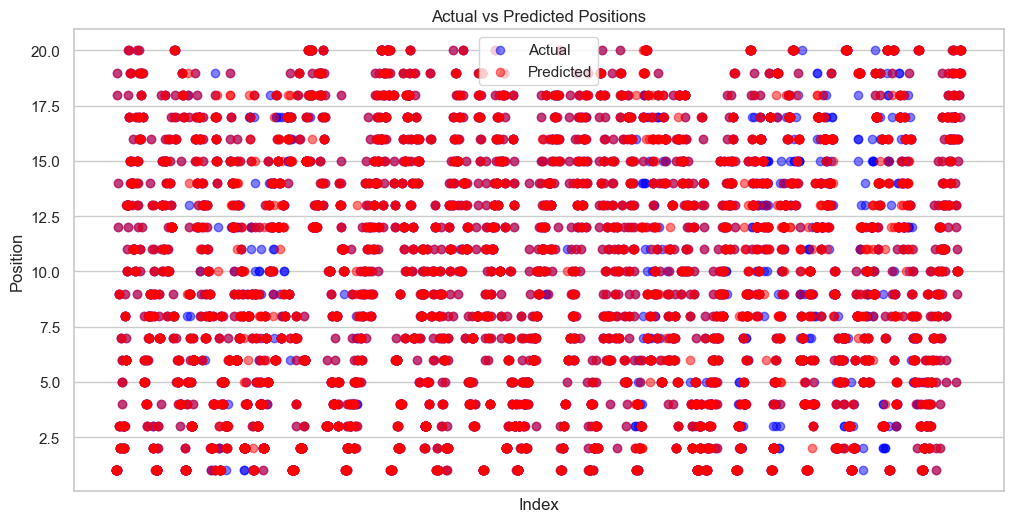

In [73]:
# Plotting Actual vs Predicted results

plt.figure(figsize=(12, 6))
plt.scatter(plot_data.index, plot_data['Actual'], color='blue', label='Actual', alpha=0.5)
plt.scatter(plot_data.index, plot_data['Predicted'], color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted Positions')
plt.xlabel('Index')
plt.ylabel('Position')
plt.xticks([])
plt.legend()
plt.show()

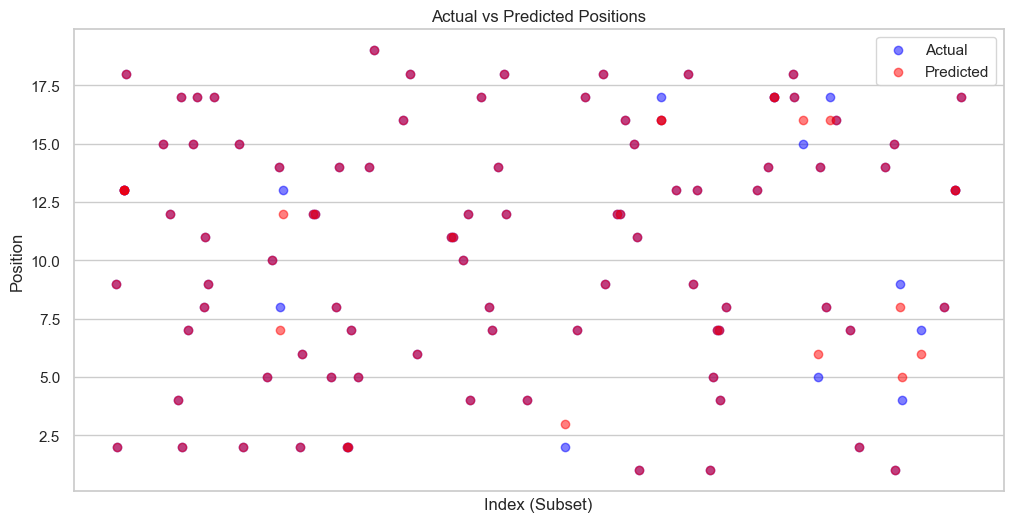

In [72]:
# Reducing the index size for the plot to focus on a smaller subset of data for clearer visualization

# Selecting a subset of data for clearer visualization
subset_data = plot_data.sample(n=100, random_state=42)  # Adjust the sample size as needed

# Plotting Actual vs Predicted results on the subset
plt.figure(figsize=(12, 6))
plt.scatter(subset_data.index, subset_data['Actual'], color='blue', label='Actual', alpha=0.5)
plt.scatter(subset_data.index, subset_data['Predicted'], color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted Positions')
plt.xlabel('Index (Subset)')
plt.ylabel('Position')
plt.xticks([])
plt.legend()
plt.show()